# Import Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


# Import Data (IBM Stock price selama 11 tahun)

In [2]:
# dateparse = lambda x:pd.datetime.strptime(x, '%m/%d/%y')

dataset = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', parse_dates = ['Date'], index_col = ['Date'])
dataset.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM
2017-12-29,154.17,154.72,153.42,153.42,3327087,IBM


In [3]:
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [4]:
dataset.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3020, freq=None)

## Check Missing Value

In [5]:
dataset.isnull().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

## Separate data into training set and testing set

In [6]:
# Membagi data menjadi data training (2006 s/d end of 2016 years), dan testing (2017-end) dan diubah menjad numpy. Dan hanya digunakan yang nilai 'High' saja

training_set = dataset[:'2016'].iloc[:, 1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [7]:
dataset['2017':].iloc[:,1:2]

,High
Date,
2017-01-03,167.87
2017-01-04,169.87
2017-01-05,169.39
2017-01-06,169.92
2017-01-09,169.80
...,...
2017-12-22,153.00
2017-12-26,153.86
2017-12-27,153.18


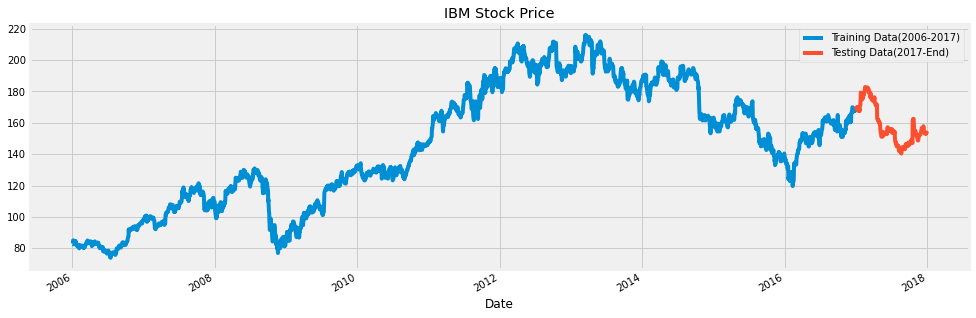

In [8]:
## Data Plot
dataset.High[:'2016'].plot(figsize=(15,5), legend=True)
dataset.High['2017':].plot(figsize=(15,5), legend=True)
plt.legend(['Training Data(2006-2017)', 'Testing Data(2017-End)'])
plt.title('IBM Stock Price')
plt.show()

## Scaling train data

In [9]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

## Create Structure of Data

In [10]:
len(training_set)

2769

In [11]:
# timestamp = 60

timestamp = 60
X_train = []
y_train = []
for i in range (timestamp, len(training_set)):
    X_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping Data into 3D

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Build Model

 ### LSTM Architecture

In [13]:
regressor = Sequential()

# 1st LSTM Layer
regressor.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# 2nd LSTM Layer
regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

# 3rd LSTM layer
regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

# 4th LSTM Layer
regressor.add(LSTM(units=50, return_sequences = False))
regressor.add(Dropout(0.2))

# Output Lyaer
regressor.add(Dense(units=1))

### Compiling and Fitting Model

In [14]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')      ## loss untuk regression (mean squared error)
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
2709/2709 [==============================] - 9s 3ms/step - loss: 0.0249
Epoch 2/50
2709/2709 [==============================] - 8s 3ms/step - loss: 0.0115
Epoch 3/50
2709/2709 [==============================] - 8s 3ms/step - loss: 0.0080
Epoch 4/50
2709/2709 [==============================] - 9s 3ms/step - loss: 0.0071
Epoch 5/50
2709/2709 [==============================] - 9s 3ms/step - loss: 0.0058
Epoch 6/50
2709/2709 [==============================] - 9s 3ms/step - loss: 0.0051
Epoch 7/50
2709/2709 [==============================] - 9s 3ms/step - loss: 0.0050
Epoch 8/50
2709/2709 [==============================] - 10s 4ms/step - loss: 0.0044
Epoch 9/50
2709/2709 [==============================] - 10s 4ms/step - loss: 0.0044
Epoch 10/50
2709/2709 [==============================] - 10s 4ms/step - loss: 0.0042
Epoch 11/50
2709/2709 [==============================] - 10s 4ms/step - loss: 0.0037
Epoch 12/50
2709/2709 [==============================] - 10s 4ms/step - loss: 0.0

## Prediction

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 245.2+ KB


In [18]:
dataset[:'2016'].iloc[:, 1:2]

,High
Date,
2006-01-03,82.55
2006-01-04,82.50
2006-01-05,82.90
2006-01-06,85.03
2006-01-09,84.25
...,...
2016-12-23,167.49
2016-12-27,167.98
2016-12-28,167.74


In [19]:
## Concat both data of training set and testing set dari data original

dataset_total = pd.concat((dataset[:'2016'].iloc[:, 1:2],dataset['2017':].iloc[:, 1:2]),axis=0)
print(len(dataset_total['High'][:'2016']))
print(len(dataset_total['High']['2017':]))
print(len(dataset_total))

2769
251
3020


In [21]:
dataset_total.head()

,High
Date,
2006-01-03,82.55
2006-01-04,82.50
2006-01-05,82.90
2006-01-06,85.03
2006-01-09,84.25


In [22]:
# Create inputs for predicting
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)                                            # reshape input menjadi 1 kebawah (1 'kolom')
inputs = sc.transform(inputs)                                            # scaling

In [25]:
len(test_set)+timestamp

311

In [27]:
## Predict
X_test = []
for i in range (timestamp, len(test_set)+timestamp):                                     ## start dari 60 sebelum 3rd january, dan 80(60+20) 20nya yaitu jumlah data pada test set
    X_test.append(inputs[i-timestamp:i, 0])                        ## X_test inputnya pada index ke 60 (3rd january)

X_test = np.array(X_test)                                         ## mengubahnya kedalam np array
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  ## reshape into 3D
predicted_stok_price = regressor.predict(X_test)
predicted_stok_price = sc.inverse_transform(predicted_stok_price)

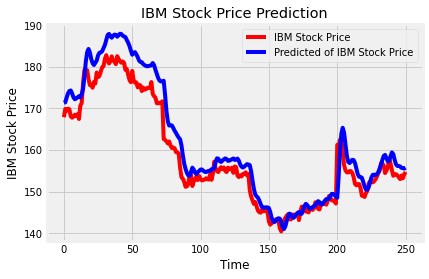

In [32]:
## Result

def plot_prediksi(test,predicted):
    plt.plot(test, color='red',label = 'IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted of IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()
    

plot_prediksi(test_set,predicted_stok_price)

In [35]:
def hasil_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("RMSE : {}.".format(rmse))    
    
hasil_rmse(test_set,predicted_stok_price)

RMSE : 4.057460951805423.


# GRU LSTM

In [38]:
# The GRU architecture
regressorGRU = Sequential()

# 1st GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# 2nd GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# 3rd GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# 4th GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.1099
Epoch 2/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0290
Epoch 3/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0071
Epoch 4/50
2709/2709 [==============================] - 4s 2ms/step - loss: 0.0049
Epoch 5/50
2709/2709 [==============================] - 4s 2ms/step - loss: 0.0039
Epoch 6/50
2709/2709 [==============================] - 4s 2ms/step - loss: 0.0040
Epoch 7/50
2709/2709 [==============================] - 4s 2ms/step - loss: 0.0035
Epoch 8/50
2709/2709 [==============================] - 4s 2ms/step - loss: 0.0035
Epoch 9/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0034
Epoch 10/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0032
Epoch 11/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0030
Epoch 12/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0031
E

## prediction

In [39]:
X_test = []
for i in range (timestamp, len(test_set)+timestamp):  
    X_test.append(inputs[i-timestamp:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)


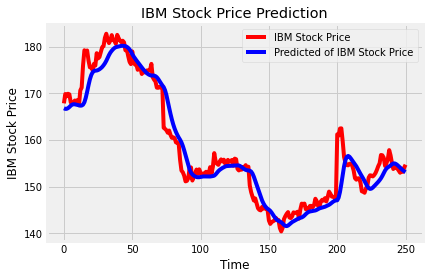

In [41]:
# Visualizing the results for GRU
plot_prediksi(test_set,GRU_predicted_stock_price)

In [42]:
# Evaluating GRU
hasil_rmse(test_set,GRU_predicted_stock_price)

RMSE : 3.206497108377756.


Berdasarkan hasil diatas, hasil pada GRU lebih baik daripada LSTM (RMSE)